In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms, models
import time
import os
import copy
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.utils.data as Data
import numpy as np
import matplotlib.pyplot as plt
from data import microPlankton
import cv2 as cv
from torchvision import transforms
from torch.utils.data.dataloader import DataLoader
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from dataTransformNew_v2 import dataTran
import time
import winsound

batchSize = 32  # 11111111111
numClasses = 1
numEpoch = 300
testSize = 0.2  # 11111111111
learningRate = 0.0001  # 11111111111 0.001
dropNum = 0.5
momentum = 0.9

featureExtract = True
usePretrained = False
dropout = True
mono = True
savePreAndRealFlag = True

samplePath = 'D:/Plankton_images_database/Eastsound_2015_database/'
inputSize = 300
imgType = '.tif'
#txtFile = "eastsound_training_data.txt"  # 11111111111
txtFile = "test.txt" 
#modelName = "shufflenet_v2_x1_5" #original one used for diatoms
modelName = "vgg19" #me playing with it
filePath = "C:/automated_classification/holographic_plankton_classification-main/"
savePath = 'C:/automated_classification/holographic_plankton_classification-main/modelGen/' + modelName + '_'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# --------------------find the input size for padding START
def findMax(imgPath, fileType):
    maxPixel = 0
    for mainPath, dirs, file in os.walk(imgPath, topdown=False):
        for subFolderName in dirs:  # read subfolder
            pathNow = os.path.join(mainPath, subFolderName)
            for subMainPath, subDirs, subFile in os.walk(pathNow, topdown=False):  # find data file
                for dataFile in subFile:  # read data file
                    if os.path.splitext(dataFile)[1] == fileType:  # find data with specific suffix
                        img = cv.imread(subMainPath + '/' + dataFile)
                        try:
                            tempPixel = max(img.shape)
                        except:
                            print(dataFile)
                        maxPixel = max(tempPixel, maxPixel)
    return maxPixel


# inputSize = findMax(samplePath, imgType)
# --------------------find the input size for padding END

dataTransforms = {
    "trainData": transforms.Compose([
        # transforms.Resize(inputSize),
        # transforms.RandomCrop(size=inputSize, pad_if_needed=True, padding_mode='constant'),
        transforms.RandomHorizontalFlip(p=0.5),  # horizontal flip and 0.5 is the position
        transforms.RandomVerticalFlip(p=0.5),
        torchvision.transforms.RandomRotation(45, resample=False, expand=False,
                                              center=None),
        transforms.ToTensor(),
        # transforms.Normalize([],[])
    ]),
    "testData": transforms.Compose([
        # transforms.Resize(inputSize),
        # transforms.RandomCrop(size=inputSize, pad_if_needed=True, padding_mode='constant'),
        transforms.RandomHorizontalFlip(p=0.5),  # horizontal flip and 0.5 is the position
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ToTensor(),
        # transforms.Normalize([],[])
    ])
}

imagDataset = microPlankton(root=filePath, dataTXT=txtFile, )
train_set, test_set = train_test_split(imagDataset, test_size=testSize,random_state=42)
trainSet = dataTran(inputSize,train_set, transform=dataTransforms["trainData"])
testSet = dataTran(inputSize,test_set, transform=dataTransforms["testData"])
testDataloader = torch.utils.data.DataLoader(testSet, batch_size=batchSize, shuffle=True, num_workers=0,
                                             pin_memory=True)
trainDataloader = torch.utils.data.DataLoader(trainSet, batch_size=batchSize, shuffle=True, num_workers=0,
                                              pin_memory=True)

In [19]:
print(train_set)

[(<PIL.Image.Image image mode=F size=75x79 at 0x1AA94BD84C8>, 0), (<PIL.Image.Image image mode=F size=774x772 at 0x1AA94BD8708>, 0), (<PIL.Image.Image image mode=F size=459x475 at 0x1AA94BD8948>, 0), (<PIL.Image.Image image mode=F size=784x694 at 0x1AA94BD8D08>, 0), (<PIL.Image.Image image mode=F size=2048x587 at 0x1AA94BD8F88>, 0), (<PIL.Image.Image image mode=F size=784x694 at 0x1AA94BDF408>, 0), (<PIL.Image.Image image mode=F size=993x604 at 0x1AA94BD8248>, 0), (<PIL.Image.Image image mode=F size=385x337 at 0x1AA94BDFB88>, 0)]


In [20]:
for images,labels in trainDataloader:
            images, labels = images.to(device), labels.to(device)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


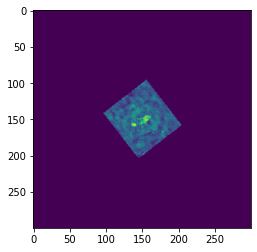

In [30]:
index = images[6].cpu().data.numpy()
print(index)
plt.imshow(index[0])
#plt.imshow(index[0].permute(2, 1, 0))

In [30]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch
import numpy as np
from PIL import Image
import cv2 as cv

outputSize= 300
transform=dataTransforms["trainData"]
dataSet= train_set


def __init__(self,outputSize, dataSet, transform):
        self.dataSet = dataSet
        self.transform = transform
        self.padToNum = outputSize
        #self.target_transform = target_transform

#self.dataSet = dataSet
#self.transform = transform
#padToNum = outputSize
#self.target_transform = target_transform

def __getitem__(self, item):
        imgData, label = self.dataSet[item]
        padTo = self.padToNum
#imgData, label = dataSet
#padTo = padToNum

        if imgData.size[0]> padTo or imgData.size[1]> padTo:
            imgData=cv2.imread(imgData, 0)
            imgData=cv.resize(imgData,(padTo, padTo),interpolation = cv.INTER_AREA)
        if self.transform is not None:

            a = (padTo - imgData.size[0]) // 2
            b = (padTo - imgData.size[1]) // 2

            transform1 = transforms.Pad((a, b, padTo - a - imgData.size[0], padTo - b - imgData.size[1]), fill=0,
                                                padding_mode='constant')
            try:
                imgData = transform1(imgData)
                img = self.transform(imgData)
            except:
                print(imgData)
        return img, label
        print(img)

<PIL.Image.Image image mode=F size=75x79 at 0x1AA94BD84C8>
75
(79, 75)


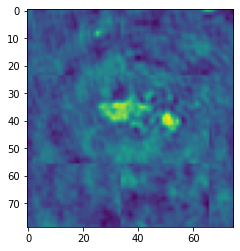

In [23]:
dataSet= train_set
for i in range (0,1):
    imgData, label = dataSet[i]
    print(imgData)
    print(imgData.size[0])
#imgData=cv.resize(imgData,(300, 300),interpolation = cv.INTER_AREA)
    open_cv_image = np.array(imgData) 
    plt.imshow(open_cv_image)
    #open_cv_image=cv.resize(open_cv_image,(open_cv_image.shape[1],300),interpolation = cv.INTER_AREA)
#cv.imread(open_cv_image)
    #open_cv_image = open_cv_image[:, ::-1].copy() 
    print(open_cv_image.shape)
    plt.imshow(open_cv_image)

In [69]:
imgDat = Image.fromarray(open_cv_image)
print((imgDat))

<PIL.Image.Image image mode=F size=300x300 at 0x193A0202F88>


In [5]:
dataSet= train_set
print((dataSet))

[(<PIL.Image.Image image mode=F size=75x79 at 0x1D87FB196C8>, 0), (<PIL.Image.Image image mode=F size=774x772 at 0x1D87FB64248>, 0), (<PIL.Image.Image image mode=F size=459x475 at 0x1D87FBA59C8>, 0), (<PIL.Image.Image image mode=F size=784x694 at 0x1D87FBA5E48>, 0), (<PIL.Image.Image image mode=F size=2048x587 at 0x1D87FBA5EC8>, 0), (<PIL.Image.Image image mode=F size=784x694 at 0x1D87FBAC548>, 0), (<PIL.Image.Image image mode=F size=993x604 at 0x1D87FBAC7C8>, 0), (<PIL.Image.Image image mode=F size=385x337 at 0x1D87FBACCC8>, 0)]
